#  The Barnsley Fern

Our goal is to plot a pretty fractal fern

We will use a random number generator.
For reference on numpy random numbers, see 
https://www.w3schools.com/python/numpy_random.asp

The Barnsley Fern (Barnsley, M. F. and L. P. Hurd, (1993), Fractal Image Compression, A. K. Peters, UK. 361)  is a series of points on the plane 
chosen sequentially.  

https://en.wikipedia.org/wiki/Barnsley_fern


You start with a point $(x_0, y_0)$ and then using a recipe you get a new
point $(x_1, y_1)$.  Each point depends on the previous one.
With the n-th point the n+1-th point is

$$\begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} 
    = \begin{pmatrix} 0.5 \\ 0.27 y_n \end{pmatrix} \ {\rm  with} \ 2\%\ {\rm probability} $$
$$\begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = 
    \begin{pmatrix} -0.139 & 0.263  \\ 0.246 & 0.224 \end{pmatrix}
    \begin{pmatrix} x_n \\ y_n \end{pmatrix}
    + \begin{pmatrix} 0.57 \\ -0.036 \end{pmatrix}
    \ {\rm  with} \ 15\%\ {\rm probability} 
$$
$$\begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = 
    \begin{pmatrix} 0.170 & -0.215  \\ 0.222 & 0.176 \end{pmatrix}
    \begin{pmatrix} x_n \\ y_n \end{pmatrix}
    + \begin{pmatrix} 0.408 \\ 0.0893 \end{pmatrix}
    \ {\rm  with} \ 13\%\ {\rm probability} 
$$
$$\begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = 
    \begin{pmatrix} 0.781 & 0.034  \\ -0.032 & 0.739 \end{pmatrix}
    \begin{pmatrix} x_n \\ y_n \end{pmatrix}
    + \begin{pmatrix} 0.1075 \\ 0.27 \end{pmatrix}
    \ {\rm  with} \ 70 \%\ {\rm probability} 
$$



Suppose we have a random variable $r \in [0,1)$.
The four probability regions are
in the ranges 

$r<0.02$

$0.02 \le r <0.17$

$0.17 \le r <0.3$

$0.3 \le r <1$

A good starting point is $(x_0,y_0) = (0.5,0)$

Our goal is to generate 10000 points with this recipe and plot them.
The result should be something that looks like a  fern.

In [1]:
# import numpy and a random number generator
import numpy as np
from numpy import random
# make it possible to plot figures within the notebook
%matplotlib inline
from matplotlib import pyplot as plt
# matplotlib allows us to make figures

In [2]:
# an example using the random number generator
# x will be a randomly generated number in [0,1)
x = random.random()
print(x)

0.26581258661910023


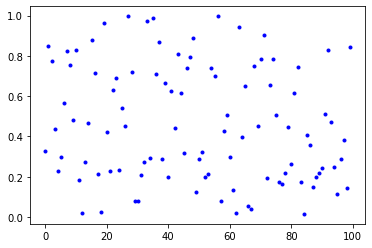

In [6]:
# x will be an array of 100 randomly generated numbers in [0,1)
xvec = random.random(100)
plt.plot(xvec,'b.')

The recipe for making the fern is comprised of (can  be written in termes of) 
affine transformations of the plane.
In Euclidean geometry, an affine transformation  is a geometric transformation that preserves lines and parallelism but not necessarily distances and angles. 

### Affine transformations 

1. Scaling 

$$ \begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = 
 \begin{pmatrix} s_x x_{n} \\ s_y y_{n}  \end{pmatrix} $$
 The x coordinate is caled by $s_x$ and the y coordinate is scaled
 by $s_y$.
 
If $|s_x| <1$ then x coordinates progressively get closer to the origin.
If $|s_x|>1$ then then x coordinates get further from the origin.

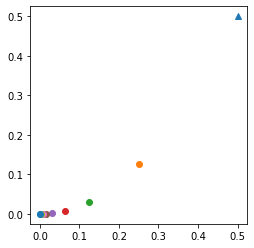

In [3]:
# Showing some affine transformations
# An affine transformation that scales the vector (x,y)
# by factors sx and sy and returns (sx*x,sy*y)
def scale_xy(x,y,sx,sy):
    new_x = x*sx
    new_y = y*sy
    return new_x, new_y

x = 0.5; y=0.5 # initial coordinates
sx = 0.5; sy = 0.25  # scale factors
fig,ax = plt.subplots(1,1)
ax.set_aspect('equal')  # enforce the aspect ratio
ax.plot(x,y,'^')  #plot the initial point as a triangle
# plot ten iterations of the scaling transformation 
for i in range(10):
    x,y = scale_xy(x,y,sx,sy)   # compute the scaling transformation 
    ax.plot(x,y,'o') # plot the new points
    

### Affine transformations 

2. Translations 

$$ \begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = 
 \begin{pmatrix} x_{n} \\ y_{n}  \end{pmatrix} 
    + \begin{pmatrix} c_x \\ c_y  \end{pmatrix}
$$
Points are shifted by the vector $(c_x,c_y)$.


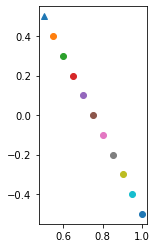

In [4]:
# An affine transformation that translates the vector (x,y)
# by (cx,cy) and returns (x,y) + (cx,cy)
def translate_xy(x,y,cx,cy):
    new_x = x + cx
    new_y = y + cy
    return new_x, new_y

# display a series of points
x = 0.5; y=0.5 # initial coordinates
cx = 0.05; cy=-0.1 # translation vector
fig,ax = plt.subplots(1,1)
ax.set_aspect('equal')  # enforce the aspect ratio
ax.plot(x,y,'^')  #plot the initial point as a triangle
# plot ten iterations of the translate transformation 
for i in range(10):
    x,y = translate_xy(x,y,cx,cy)  # compute the translation transformation 
    plt.plot(x,y,'o') # plot the new points

### Affine transformations 

3. Rotations 

$$ \begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = 
 \begin{pmatrix} \cos \theta & -\sin \theta \\ 
\sin \theta & \cos \theta  \end{pmatrix}
 \begin{pmatrix} x_{n} \\ y_{n}  \end{pmatrix} 
$$
Points are rotated by the angle $\theta$ which is in radians.

The rotation can also be written 
$$ \begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = 
 \begin{pmatrix} \cos \theta \  x_n  -\sin \theta\  y_n  \\ 
\sin \theta \ x_n + \cos \theta \ y_n\end{pmatrix}
$$


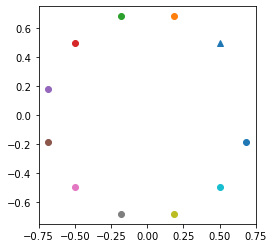

In [5]:
# An affine transformation that rotates the vector (x,y)
# by angle theta and returns the rotated vector 
def rotate_xy(x,y,theta):
    new_x = np.cos(theta)*x - np.sin(theta)*y
    new_y = np.sin(theta)*x + np.cos(theta)*y
    return new_x, new_y

# display a series of points
x = 0.5; y=0.5 # initial coordinates
theta =  30*np.pi/180 # angle of 30 degrees in radians
fig,ax = plt.subplots(1,1)
ax.set_aspect('equal')  # enforce the aspect ratio
ax.plot(x,y,'^')  # plot the initial point
# plot ten iterations of the rotation transformation 
for i in range(10):
    x,y = rotate_xy(x,y,theta)   # compute the rotation transformation 
    plt.plot(x,y,'o') # plot the new points

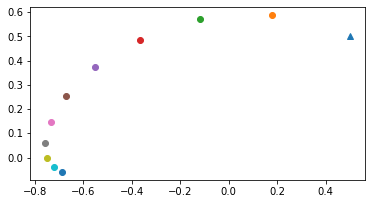

In [6]:
# showing a more complex affine transformation done sequentially
x = 0.5; y=0.5 # initial coordinates
theta =  20*np.pi/180 # angle in radians
sx = 0.9; sy=0.7;  #scaling factors
cx = -0.1; cy = 0.2 # translations
fig,ax = plt.subplots(1,1)
ax.set_aspect('equal')  # enforce the aspect ratio
ax.plot(x,y,'^')  # plot the initial point
# plot ten iterations 
for i in range(10):
    # a series of transformations 
    x,y = rotate_xy(x,y,theta)   # compute the rotation transformation 
    x,y = translate_xy(x,y,cx,cy) 
    x,y = scale_xy(x,y,sx,sy)
    plt.plot(x,y,'o') # plot the new points

In [7]:
# carrying out different intructions with different probabilities
def carry_out_prob():
    r = random.random()  #  a random number in [0,1)
    if (r >= 0) and (r< 0.3):
        print('first case')  # do this if r <0.3
    if (r >- 0.3) and (r <1):
        print('second case')  # do this if 0.3 <= r < 1
        
for i in range(10):
    carry_out_prob()

second case
first case
second case
second case
second case
second case
second case
second case
first case
second case
second case
first case
second case
